# Sales Analysis:

Import Necesary Libraries

In [1]:
# imports:
%pylab inline
import os
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Step 1: Data Collection

- Murging multiple data sets to generate the required data dataframe

### A. Merging 12 months of sales data into a single file:

In [2]:
files_path = 'C:/Users/Nada Abbas/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'
def full_path(file):
    return files_path+file
dirs = list(map(full_path,os.listdir(files_path)))

In [3]:
df = pd.read_csv(dirs[0])
for i in range(1,len(dirs)):
    df = pd.concat([df,pd.read_csv(dirs[i])], ignore_index=True)


In [4]:
df.to_csv('full data', index=False)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


## Step 2: Data Preprocessing

### Major Tasks of Data Pre-processing:
- <b>Data cleaning:
    
Fill in missing values, smooth noisy data, identify or remove outliers, and resolve inconsistencies
- <b>Data integration:
    
Integration of multiple databases, data cubes, or files
- <b>Data reduction:
    
1- Dimensionality reduction<br> 
2- Numerosity reduction<br> 
3- Data compression<br> 
    
- <b>Data transformation and data discretization:
    
1- Normalization<br> 
2- Concept hierarchy generation



## 1- Data Cleaning:
### 1.1- Removing Missing Values:

In [5]:
nan_rows = df[df.isnull().T.any()]
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
nan_rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nan_rows.index
df = df.drop(nan_rows.index)

In [8]:
df.reset_index(inplace=True)
#df.drop(df['index'])
df.head(10)


,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
5,6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
6,7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
7,8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
8,9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
9,10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [9]:
nan_rows = df[df.isnull().T.any()]
df.isnull().sum()

index               0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
nan_rows

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df.head(5)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 1.2- Smooth Noisy Data:

In [12]:
# setting conditions for removing noisy data
# 1) test for ID number of digits or negative value
for val, index in zip(df['Order ID'].values, df['Order ID'].index):
    noise = False
    if len(val)!=6 or int(val)<0:
        noise=True
        df=df.drop(int(index))

### 1.3- Remove outliers:
<b> remove outlier quantities in the quantity ordered <b>

In [22]:
# compute total purchases:
df['Price Each'] = df['Price Each'].astype(float)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)

df['Total Purchases'] = df['Quantity Ordered']*df['Price Each']

In [23]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Purchases
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",99.99
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.00
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",11.99


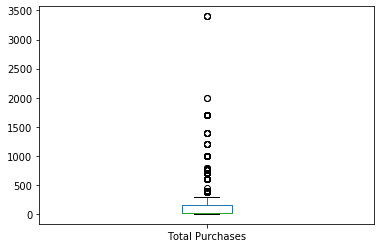

In [24]:
df['Total Purchases'].plot(kind='box')

In [40]:
q3, q1 = np.percentile(df['Total Purchases'], [75 ,25])
iqr = q3 - q1
max_ = q3+1.5*iqr
outliers = df['Total Purchases']>max_

<b> Here appears to be large number of outliers but those tend to be realistic as there are some purchases of high values 

In [41]:
100*37027/185950  ## about 20% of the data exceeds the q3 value

19.912342027426728

In [64]:
# would filter the data greater than the value of 1000
filtered = df['Total Purchases']>max_
 
for index, i in zip(filtered. index,filtered.values):
    if i==True:
        df=df.drop(int(index))

In [65]:
df['Total Purchases']>max_

0         False
2         False
4         False
5         False
6         False
          ...  
186842    False
186843    False
186844    False
186845    False
186849    False
Name: Total Purchases, Length: 148923, dtype: bool

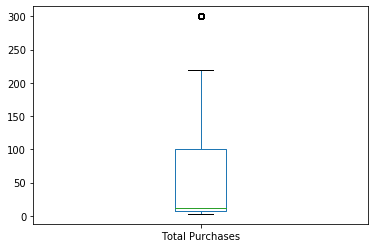

In [66]:
df['Total Purchases'].plot(kind='box')

## Step 2-1 : Understand My Data
### Data Analysis:
#### 1- What was the best month for Sales:


In [47]:
df.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Purchases
186840,259349,AAA Batteries (4-pack),1.0,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",2.99
186841,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00
186842,259350,USB-C Charging Cable,1.0,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",11.95
186843,259351,Apple Airpods Headphones,1.0,150.00,09/01/19 19:43,"981 4th St, New York City, NY 10001",150.00
186844,259352,USB-C Charging Cable,1.0,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",11.95
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99
186849,259357,USB-C Charging Cable,1.0,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",11.95


In [48]:
df['Order Date'].values[0]   # type is string not datetime format
df['Order Date'] = list(map(pd.to_datetime, df['Order Date']))   # convert to datetime format

In [49]:
df['Date'] = [i.date() for i in df['Order Date']]
df['Month'] =[i.date().month for i in df['Order Date']] 
df['Time'] = [i.time() for i in df['Order Date']]

In [50]:
df.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Purchases,Date,Month,Time
186840,259349,AAA Batteries (4-pack),1.0,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",2.99,2019-09-01,9,22:14:00
186841,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,2019-09-30,9,13:49:00
186842,259350,USB-C Charging Cable,1.0,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",11.95,2019-09-30,9,13:49:00
186843,259351,Apple Airpods Headphones,1.0,150.00,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",150.00,2019-09-01,9,19:43:00
186844,259352,USB-C Charging Cable,1.0,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",11.95,2019-09-07,9,15:49:00
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019-09-17,9,20:56:00
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019-09-01,9,16:00:00
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019-09-23,9,07:39:00
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019-09-19,9,17:30:00
186849,259357,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",11.95,2019-09-30,9,00:18:00


Text(0, 0.5, 'No. of purchases (item)')

<Figure size 432x288 with 0 Axes>

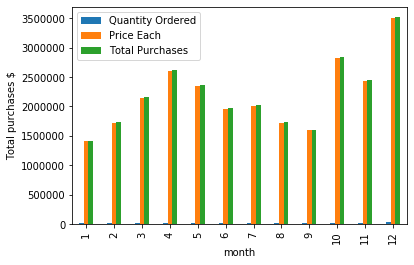

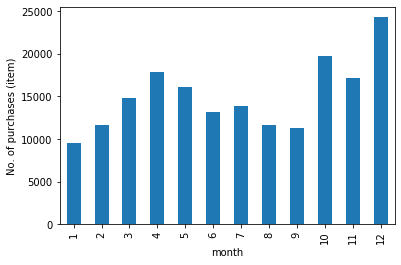

In [60]:
# visualizing purchases per month
purchase_count1 = df.groupby('Month').sum()
purchase_count2 = df.groupby('Month').size()

#fig, axs = plt.subplots(1,2)
plt.figure()
purchase_count1.plot(kind = 'bar')#,ax=axs[0])
plt.xlabel('month')
plt.ylabel('Total purchases $')

plt.figure()
purchase_count2.plot(kind = 'bar')#,ax=axs[1])
plt.xlabel('month')
plt.ylabel('No. of purchases (item)')

#### 2- City of highest purchases? 

In [67]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Purchases,Date,Month,Time
186842,259350,USB-C Charging Cable,1.0,11.95,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",11.95,2019-09-30,9,13:49:00
186843,259351,Apple Airpods Headphones,1.0,150.00,2019-09-01 19:43:00,"981 4th St, New York City, NY 10001",150.00,2019-09-01,9,19:43:00
186844,259352,USB-C Charging Cable,1.0,11.95,2019-09-07 15:49:00,"976 Forest St, San Francisco, CA 94016",11.95,2019-09-07,9,15:49:00
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019-09-17,9,20:56:00
186849,259357,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",11.95,2019-09-30,9,00:18:00


In [69]:
#df2 = df["Address"].apply(lambda x: x.split(","))
#df2
#df[city] = df2.apply(lambda x: " ".join(x[0].split()[1:]))
